**ĐIỀN VÀO ...** NẾU BẠN THẤY CÂU **"WRITE YOUR CODE HERE"**

In [2]:
import sklearn, pandas


# Load một số dữ liệu bán nhà

Tập dữ liệu bán nhà quận King, khu vực đóng ở Seatle, tiểu bang Washington, Hoa Kỳ. Tập dữ liệu được đặt tên **"home_data.csv"**

Hãy import tập dữ liệu.

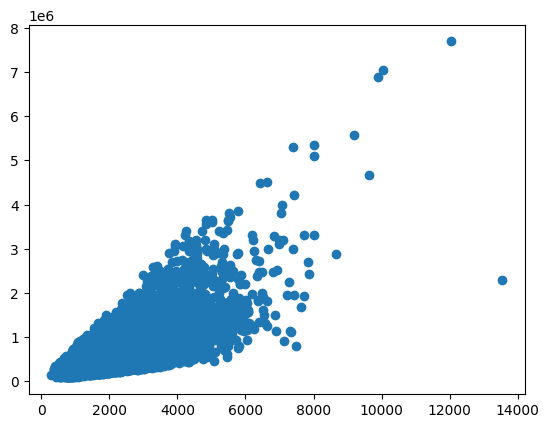

529242.6106870229
248879.06143647005
244004.77443104092


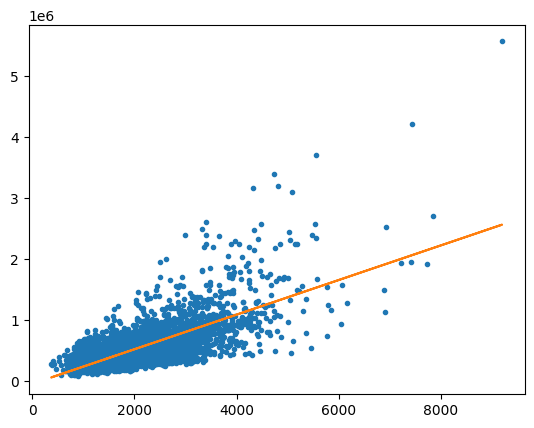

In [39]:
import pandas as pd
sales = pd.read_csv('home_data.csv')

import matplotlib.pyplot as plt
%matplotlib inline

# WRITE YOUR CODE HERE
plt.scatter(x = sales.iloc[:,5],y = sales.iloc[:,2])
plt.show()


from sklearn.model_selection import train_test_split

# WRITE YOUR CODE HERE
train_data,test_data = train_test_split( sales.iloc[:,],test_size = 0.2, random_state = 0 )

# WRITE YOUR CODE HERE
from sklearn.linear_model import LinearRegression
import numpy as np

# WRITE YOUR CODE HERE
sqft_model = LinearRegression()
sqft_model.fit(np.reshape(train_data["sqft_living"].values, [-1, 1]),train_data["price"])
print(test_data['price'].mean())
# WRITE YOUR CODE HERE
prediction = sqft_model.predict(np.reshape(test_data["sqft_living"].values, [-1, 1]))
labels = test_data['price']

print(np.sqrt(sklearn.metrics.mean_squared_error(labels.values, prediction)))

# WRITE YOUR CODE HERE
plt.plot(test_data[ "sqft_living" ],
         test_data[ 'price' ],'.',
          test_data ['sqft_living'],
         sqft_model.predict(np.reshape(test_data["sqft_living"].values, [-1, 1])),
         '-')
sqft_model.coef_

# WRITE YOUR CODE HERE
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
# WRITE YOUR CODE HERE
my_features_model = LinearRegression()
my_features_model.fit(train_data[my_features] , train_data["price"])
predictions = my_features_model.predict(test_data[my_features])
print(np.sqrt(sklearn.metrics.mean_squared_error(labels.values, predictions)))

# Thăm dò dữ liệu bán nhà

 Giá nhà tương quan với diện tích không gian sống. In ra một biểu đồ phân tán (scatter plot) để thể hiện điều này. 

**Gợi ý**: sử dụng "sqft_living" và "price" 

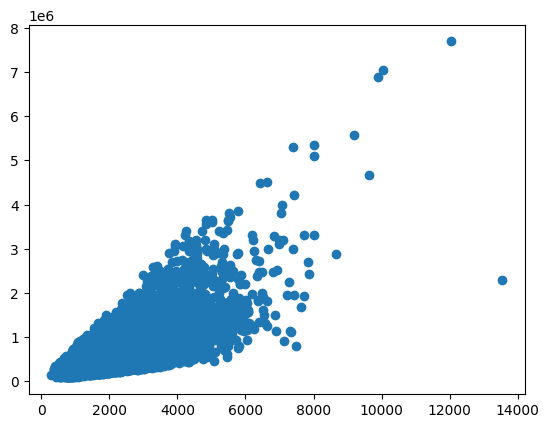

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# WRITE YOUR CODE HERE
plt.scatter(x = sales.iloc[:,5],y = sales.iloc[:,2])
plt.show()

# Tạo một mô hình hồi quy đơn giản về sqft_living với price

Chia dữ liệu thành training và testing.  
Chúng ta sử dụng seed=0 để mọi người chạy notebook này có kết quả như nhau. Ở lab này, cần thiết lập **train_size=0.8, test_size=0.2, and random_state=0**

In [9]:
from sklearn.model_selection import train_test_split

# WRITE YOUR CODE HERE
train_data,test_data = train_test_split( sales.iloc[:,],test_size = 0.2, random_state = 0 )

## Tạo một mô hình hồi quy tuyến tính chỉ dùng sqft_living làm feature

Tạo một mô hình hồi quy tuyến tính và huấn luyện nó với tập dữ liệu huấn luyện.

In [43]:
from sklearn.linear_model import LinearRegression
import numpy as np
sqft_model = LinearRegression()
sqft_model.fit(np.reshape(train_data["sqft_living"].values, [-1, 1]),train_data["price"])

LinearRegression()

# Đánh giá mô hình đơn giản

In [44]:
print(test_data['price'].mean())

529242.6106870229


Đưa ra dự đoán và tính sai số toàn phương trung bình (MSE).

In [45]:
# WRITE YOUR CODE HERE
prediction = sqft_model.predict(np.reshape(test_data["sqft_living"].values, [-1, 1]))
labels = test_data['price']

print(np.sqrt(sklearn.metrics.mean_squared_error(labels.values, prediction)))

248879.06143647005


MSE khoảng \$248,879\$!

# Hãy xem dự đoán của chúng ta thế nào

Matplotlib là một thư viện hữu ích của Python để vẽ đồ thị. Bạn có thể cài đặt nó với:

'pip install matplotlib'

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

Vẽ đường hồi quy. 

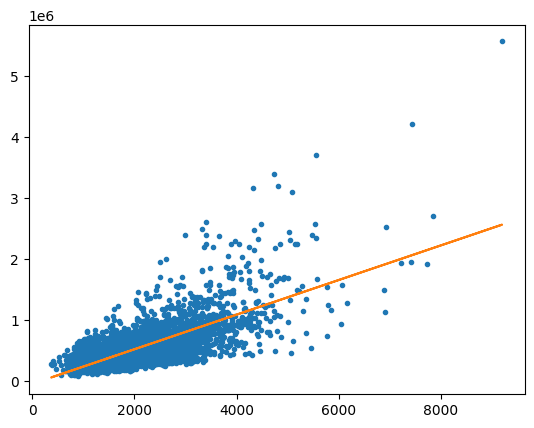

In [47]:
from sklearn.linear_model import LinearRegression
import numpy as np

# WRITE YOUR CODE HERE

plt.plot(test_data[ "sqft_living" ],
         test_data[ 'price' ],'.',
          test_data ['sqft_living'],
         sqft_model.predict(np.reshape(test_data["sqft_living"].values, [-1, 1])),
         '-')




Phía trên: các chấm xanh là dữ liệu gốc, đường màu cam là dự đoán từ hồi quy đơn giản.

Phía dưới: chúng ta có thể thấy các hệ số hồi quy đã học.

In [48]:
sqft_model.coef_

array([283.96855737])

# Khám phá các feature khác trong dữ liệu

Hãy khám phá thêm các feature khác để tạo một mô hình phức tạp hơn.

In [49]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [50]:
test_data[my_features]
sales[my_features]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
0,3,1.00,1180,5650,1.0,98178
1,3,2.25,2570,7242,2.0,98125
2,2,1.00,770,10000,1.0,98028
3,4,3.00,1960,5000,1.0,98136
4,3,2.00,1680,8080,1.0,98074
...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,98103
21609,4,2.50,2310,5813,2.0,98146
21610,2,0.75,1020,1350,2.0,98144
21611,3,2.50,1600,2388,2.0,98027


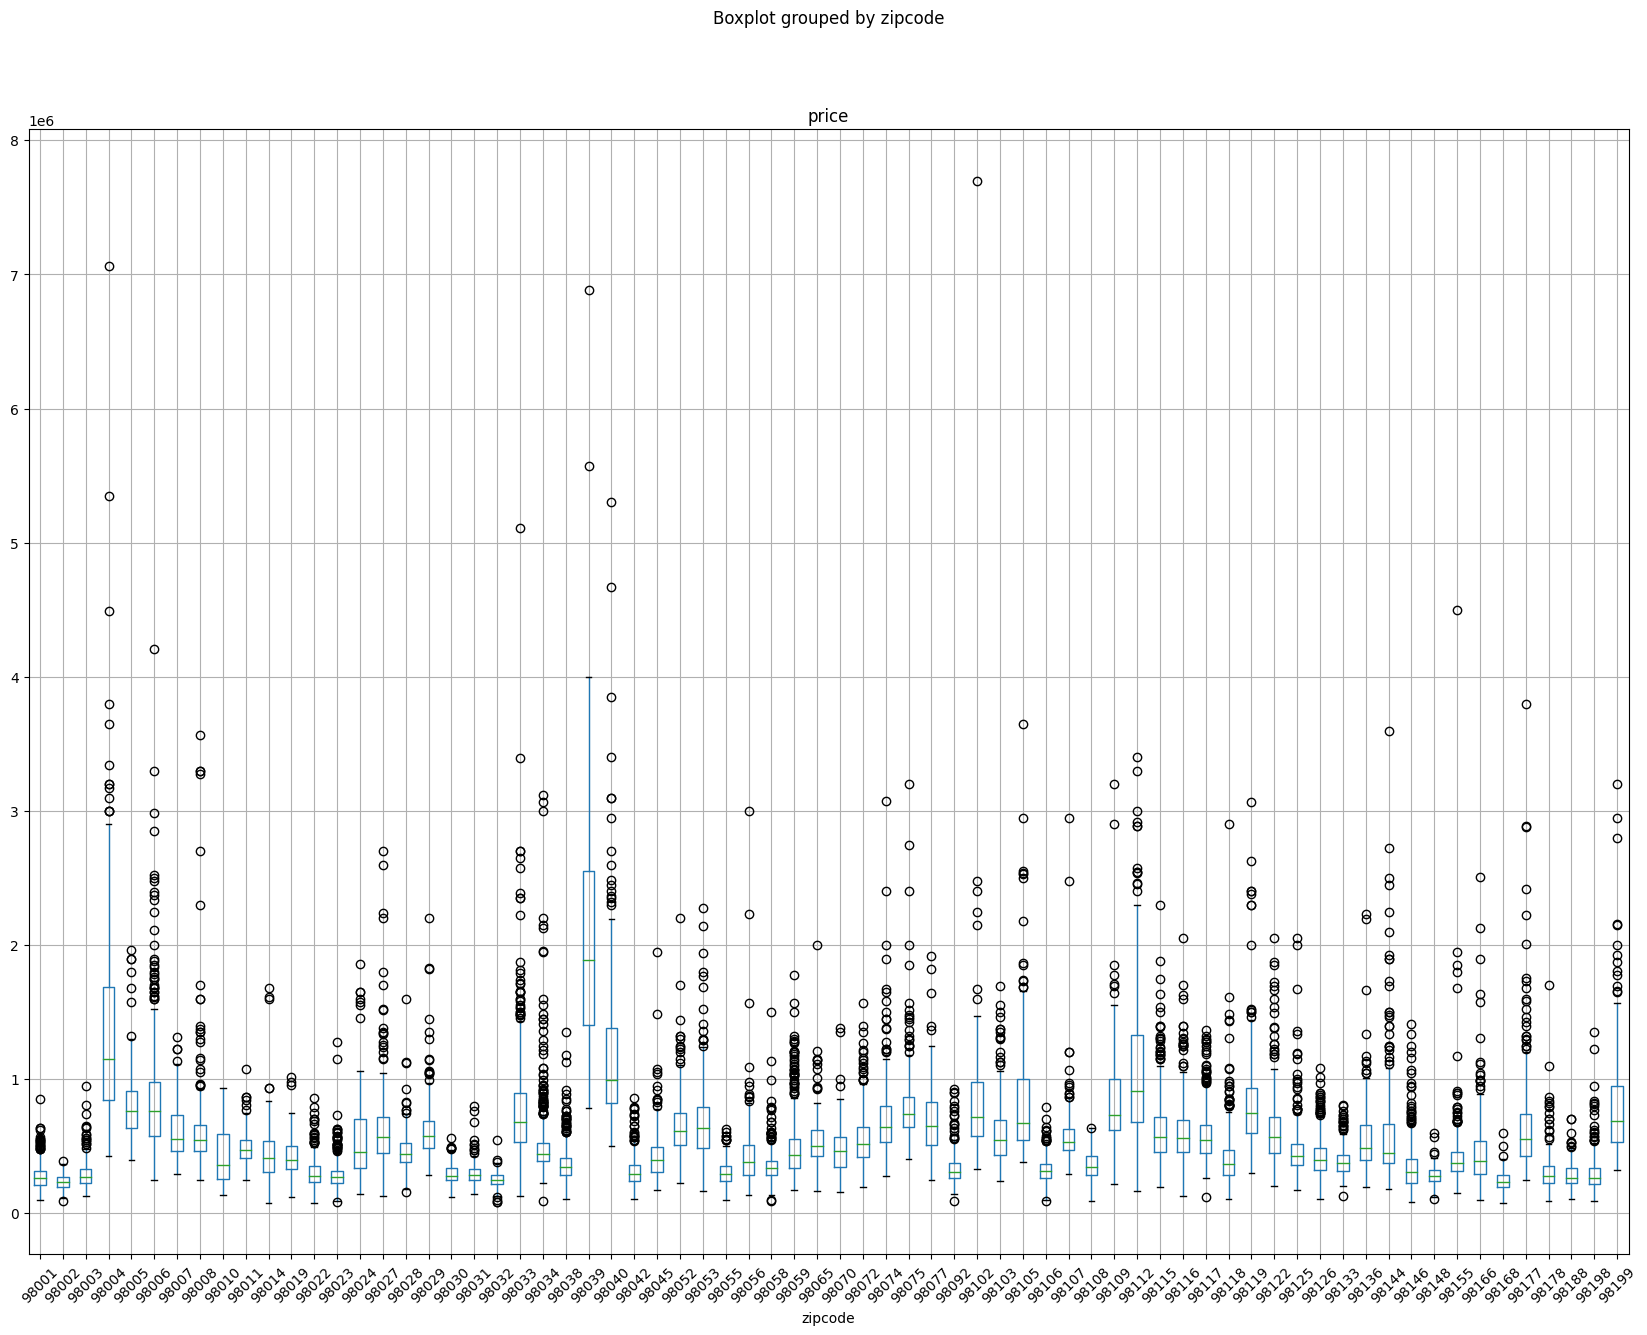

In [51]:
#data = sales[["zipcode","price"]].values
ax = sales.boxplot(column="price", by="zipcode", rot=45, figsize=(20, 15))

Kéo thanh ở cuối để xem thêm dữ liệu.

98039 là zip code đắt giá nhất.

# Tạo một mô hình hồi quy tuyến tính với nhiều feature hơn

Tạo một mô hình hồi quy tuyến tính và huấn luyện nó với tập dữ liệu huấn luyện.

In [52]:
# WRITE YOUR CODE HERE
my_features_model = LinearRegression()
my_features_model.fit(train_data[my_features] , train_data["price"])

LinearRegression()

In [53]:
print(my_features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


## So sánh kết quả của mô hình đơn giản với mô hình thêm nhiều feature

So sánh MSE giữa mô hình đơn giản với mô hình thêm nhiều feature.

In [56]:
labels = test_data['price']

prediction = sqft_model.predict(np.reshape(test_data['sqft_living'].values, [-1, 1]))
print(np.sqrt(sklearn.metrics.mean_squared_error(labels.values, prediction)))

# WRITE YOUR CODE HERE
predictions = my_features_model.predict(test_data[my_features])
print(np.sqrt(sklearn.metrics.mean_squared_error(labels.values, predictions)))

248879.06143647005
244004.77443104092


MSE giảm từ \$248.879\$ xuống \$244,004\$ khi có nhiều feature hơn. 

# Áp dụng mô hình đã học để đoán giá 3 căn nhà

Chúng ta sẽ dự đoán giá của 3 căn nhà cụ thể.

Căn nhà đầu tiên là nhà "tầm trung" ở Seatle.

In [57]:
house1 = sales.loc[sales['id']==5309101200]

In [58]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


<img src="http://blue.kingcounty.com/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [132]:
print(house1['price'])

1054    620000
Name: price, dtype: int64


In [60]:
print(sqft_model.predict(np.reshape(house1['sqft_living'].values, [-1, 1])))

[633267.47422744]


In [65]:
print(my_features_model.predict(np.reshape(house1[my_features]))

KeyError: "None of [Index([('bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode')], dtype='object')] are in the [columns]"

Trong trường hợp này, mô hình với nhiều feature hơn cho dự đoán tệ hơn mô hình đơn giản chỉ có 1 feature. Tuy nhiên, nhìn chung mô hình có nhiều feature hơn lại tốt hơn.

##Dự đoán căn nhà thứ 2: căn nhà đẹp hơn

Chúng ta sẽ xem xét các dự đoán cho một căn nhà đẹp mắt hơn.

In [139]:
house2 = sales.loc[sales['id']==1925069082]

In [ ]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [142]:
print(sqft_model.predict(np.reshape(house2["sqft_living"], [-1, 1])))

[1269357.04273158]


In [144]:
print(my_features_model.predict(house2[my_features]))

[1274443.76531347]


Trong trường hợp này, mô hình có nhiều feature cho dự đoán tốt hơn. Động thái này khá được mong đợi ở đây vì căn nhà này khác biệt bởi các feature vượt trội hơn diện tích không gian sống, đặc biệt là nó có hồ trước nhà.

##Căn nhà thứ 3: căn nhà vô cùng đẹp

Căn nhà cuối cùng rất rộng, được sở hữu bởi một người dân bản xứ.

In [147]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Residence_of_Bill_Gates.jpg">

In [148]:
bill_gates=pandas.DataFrame.from_dict(bill_gates)
print(my_features_model.predict(bill_gates[my_features]))

[15796988.23574059]


Mô hình dự đoán giá cho căn nhà này là trên 15 triệu USD! Nhưng chúng ta muốn giá cao hơn nữa. (Có rất ít mẫu trong tập dữ liệu nhà đẹp nên chúng ta không mong đợi mô hình đưa ra một dự đoán hoàn hảo ở đây).